In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
# pre-define window sizes for harris corner detection
window_sizes = (3,5,7,9,11,15,21)

# mode
EIGENVALUE = 0
HARRIS = 1

In [3]:
# image read
src_img = plt.imread('img74.png').astype(float)

In [4]:
# convolution function 
def conv(image, filter, filter_size=(3,3), pad_type='constant'):

    if len(image.shape)==3:   tmp_img = image[..., 0]
    elif len(image.shape)==2: tmp_img = image

    # get padding size from filter_size
    fx= int(filter_size[0]/2)
    fy= int(filter_size[1]/2)

    # apply padding to input image
    pad_img = np.pad(tmp_img, ((fx,fy), (fx,fy)), pad_type)
    dst = np.zeros_like(tmp_img)

    # element-wise multiply and sum operation ( = convolution)
    for i in range(tmp_img.shape[0]):
        for j in range(tmp_img.shape[1]):
            dst[i, j] = np.multiply(filter, pad_img[i:i+filter_size[0], j:j+filter_size[1]]).sum()
            
    return dst

In [5]:
# corner_type = {0:Eigenvalue, 1:Harris}
def cornerDetection(img, winSize=7, corner_type=0):
    # when I read png image, the image channel is 4.
    # So I read 3 channel and get height and width from the input image
    img = img[:, :, :3]
    img_h = img.shape[0]
    img_w = img.shape[1]

    dst_img = np.zeros_like(img)

    # sobel filter
    sobel_filter_x = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)]).astype(float)
    sobel_filter_y = np.array([(1, 2, 1), (0, 0, 0), (-1, -2, -1)]).astype(float)

    # divided by norm(filter_magnitude) in order to make unit vector
    sobel_filter_x /= 8.
    sobel_filter_y /= 8.

    # conv operation to get ix and iy using the sobel filter
    ix = conv(img, sobel_filter_x)
    iy = conv(img, sobel_filter_y)

    '''plt.figure('ix')
    plt.imshow(ix, cmap='gray')
    plt.figure('iy')
    plt.imshow(iy, cmap='gray')
    plt.show()'''
    
    # get ix*ix , ix*iy, ix*iy 
    ixx = np.square(ix)
    ixy = iy*ix
    iyy = np.square(iy)

    # get window pad size
    wp= int(winSize/2)
    
    # apply window pad size to ixx, ixy, iyy
    ixx = np.pad(ixx, ((wp,wp), (wp,wp)),'constant')
    ixy = np.pad(ixy, ((wp,wp), (wp,wp)),'constant')
    iyy = np.pad(iyy, ((wp,wp), (wp,wp)),'constant')

    # for all pixels
    for i in range(img_h):
        for j in range(img_w):

            # Get H matrix
            wdw_A = np.sum(ixx[i:i+winSize, j:j+winSize]).astype(float)
            wdw_B = np.sum(ixy[i:i+winSize, j:j+winSize]).astype(float)
            wdw_C = np.sum(iyy[i:i+winSize, j:j+winSize]).astype(float)
            
            H = np.array([[wdw_A, wdw_B], [wdw_B, wdw_C]])
            
            # corner type
            # you can get just minimum eigen value
            if corner_type==0: 
                # min_lambda ~= det(H)/trace(H)
                det_H = H[0,0]*H[1,1] - H[0,1]*H[1,0]
                trace_H = H[0,0] + H[1,1]
                
                # you must not divide it by 0
                if trace_H == 0: continue
                min_E_value = det_H/trace_H
                
                # threshould = 0.4
                # if this condition is satisfied, it make red pixel
                if min_E_value > 0.4:    dst_img[i, j, 0] = 1.

            # you can get eigen values and eigen vectors from this equation
            # but we achieve minimun eigen value for speed
            elif corner_type==1:

                # A*x=lambda*x
                # (A-lambda*I)x = 0
                # you can get lambda
                tmp_sqrt = np.sqrt(4*H[0,1]*H[1,0] + (H[0,0]-H[1,1])*(H[0,0]-H[1,1]) )/2.
                tmp_sum = (H[0, 0]+H[1,1])/2.
                
                # get minimum eigen value
                min_E_value = tmp_sum-tmp_sqrt

                # threshould = 0.4
                # if this condition is satisfied, it make red pixel
                if min_E_value > 0.4:    dst_img[i, j, 0] = 1.
    
    return dst_img


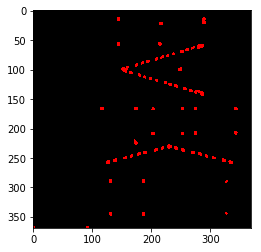

In [6]:
# detect corner and achieve corner image
dst_img = cornerDetection(src_img)
plt.figure('corner')
plt.imshow(dst_img, cmap='gray')
plt.show()

In [7]:
imgs = []
times = []
# detect corner with each window size, calculate time and stack corner images
for w_size in window_sizes:
    start = time.time()
    img = cornerDetection(src_img, w_size, EIGENVALUE)
    end = time.time()
    tim = (end-start)*1000
    print("widnow size: {}".format(w_size))
    print("process time: {}ms".format(tim))
    imgs.append(img)
    times.append(tim)

    start = time.time()
    img = cornerDetection(src_img, w_size, HARRIS)
    end = time.time()
    tim = (end-start)*1000
    print("widnow size: {}".format(w_size))
    print("process time: {}ms".format(tim))
    imgs.append(img)
    times.append(tim)

widnow size: 3
process time: 2461.961269378662ms
widnow size: 3
process time: 2718.0540561676025ms
widnow size: 5
process time: 2448.011875152588ms
widnow size: 5
process time: 2653.6948680877686ms
widnow size: 7
process time: 2426.671266555786ms
widnow size: 7
process time: 2691.8559074401855ms
widnow size: 9
process time: 2432.3484897613525ms
widnow size: 9
process time: 2692.5625801086426ms
widnow size: 11
process time: 2467.183828353882ms
widnow size: 11
process time: 2718.395471572876ms
widnow size: 15
process time: 2522.813081741333ms
widnow size: 15
process time: 2834.9900245666504ms
widnow size: 21
process time: 2598.3757972717285ms
widnow size: 21
process time: 2828.63712310791ms


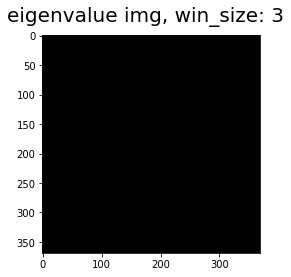

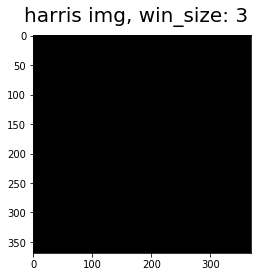

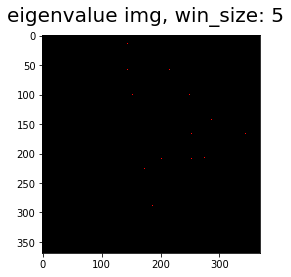

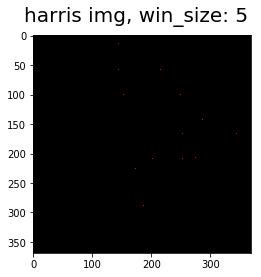

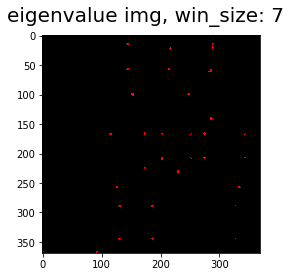

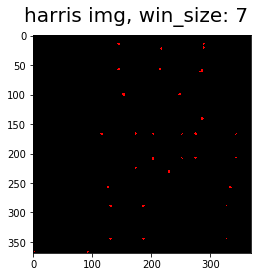

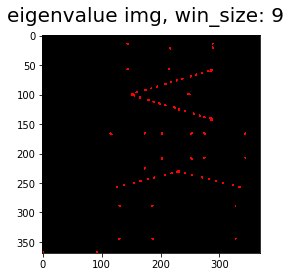

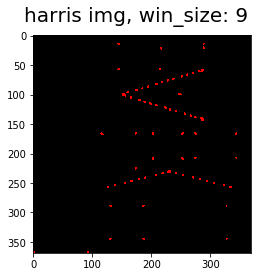

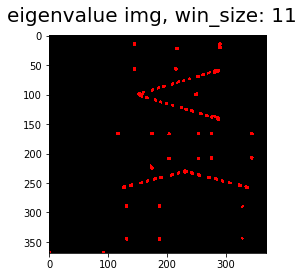

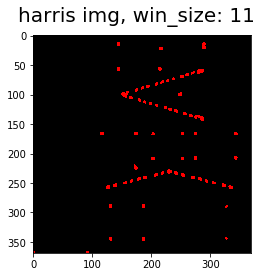

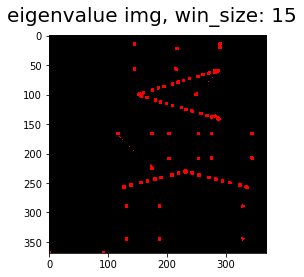

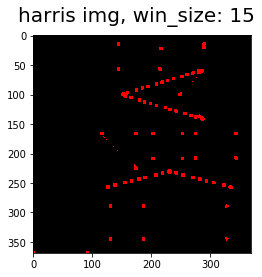

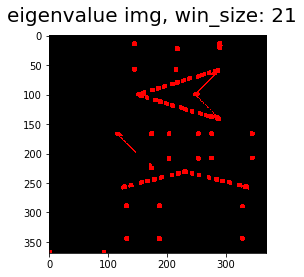

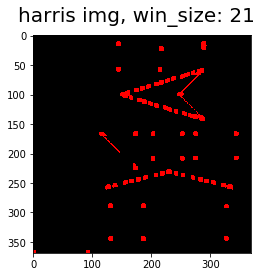

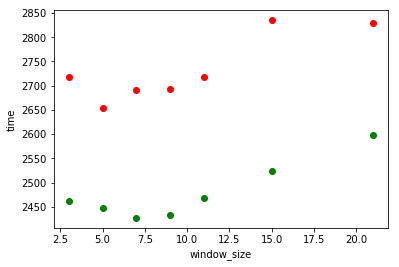

In [8]:
# plot images and times

for idx in range(int(len(imgs)/2)):
    fig = plt.figure('eigen {}'.format(idx))
    fig.suptitle('eigenvalue img, win_size: {}'.format(window_sizes[idx]), fontsize=20)
    plt.imshow(imgs[idx], cmap='gray')
    fig2 = plt.figure('harris{}'.format(idx))
    fig2.suptitle('harris img, win_size: {}'.format(window_sizes[idx]), fontsize=20)
    plt.imshow(imgs[idx], cmap='gray')

fig_time, axs = plt.subplots()
axs.set_xlabel('window_size')
axs.set_ylabel('time')

for idx in range(int(len(times)/2)):
    
    axs.plot(window_sizes[idx], times[2*idx], color='green', marker='o')
    axs.plot(window_sizes[idx], times[2*idx+1], color='red', marker='o')
    


plt.show()

1) At which window sizes can you detect all “meaningful” corners?
: 5! But this is related to threshold.

2) Which method is faster – Eigenvalue or Harris? By how much?
: Eigenvalue. About 200 ms.

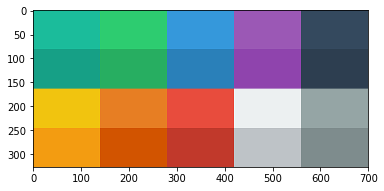

In [9]:
## BONUS ##
bns_im = plt.imread('palette.png')
plt.figure()
plt.imshow(bns_im)
plt.show()

In [10]:
# convert rgb channels to gray channel
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# detect corner for a color image
def cornerDetectColor(img, winSize=7):
    img_h = img.shape[0]
    img_w = img.shape[1]

    dst_img = np.zeros_like(img)

    # sobel filter
    sobel_filter_x = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)]).astype(float)
    sobel_filter_y = np.array([(1, 2, 1), (0, 0, 0), (-1, -2, -1)]).astype(float)

    # divided by norm(filter_magnitude) in order to make unit vector
    sobel_filter_x /= 8.
    sobel_filter_y /= 8.

    # conv operation to get ix and iy using the sobel filter
    ix = conv(img, sobel_filter_x)
    iy = conv(img, sobel_filter_y)
    
    # get ix*ix , ix*iy, ix*iy 
    ixx = np.square(ix)
    ixy = iy*ix
    iyy = np.square(iy)

    # get window pad size
    wp= int(winSize/2)
    
    # apply window pad size to ixx, ixy, iyy
    ixx = np.pad(ixx, ((wp,wp), (wp,wp)),'constant')
    ixy = np.pad(ixy, ((wp,wp), (wp,wp)),'constant')
    iyy = np.pad(iyy, ((wp,wp), (wp,wp)),'constant')

    # for all pixels
    for i in range(img_h):
        for j in range(img_w):

            # Get H matrix
            wdw_A = np.sum(ixx[i:i+winSize, j:j+winSize]).astype(float)
            wdw_B = np.sum(ixy[i:i+winSize, j:j+winSize]).astype(float)
            wdw_C = np.sum(iyy[i:i+winSize, j:j+winSize]).astype(float)
            
            H = np.array([[wdw_A, wdw_B], [wdw_B, wdw_C]])

            # min_lambda ~= det(H)/trace(H)
            det_H = H[0,0]*H[1,1] - H[0,1]*H[1,0]
            trace_H = H[0,0] + H[1,1]

            # you must not divide it by 0
            if trace_H == 0: continue
            min_E_value = det_H/trace_H

            # threshould = 0.0015
            # if this condition is satisfied, it make red pixel
            if min_E_value > 0.0015:    dst_img[i, j] = 1.
    
    return dst_img

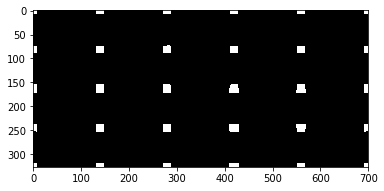

In [11]:
bns_im = rgb2gray(bns_im)
corner_color_im = cornerDetectColor(bns_im, 15)
plt.figure()
plt.imshow(corner_color_im, cmap='gray')
plt.show()
# we have to change threshould smaller to find all corners